<a href="https://colab.research.google.com/github/shubheshswain91/Machine-learning/blob/master/spam_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task 2 - Build a simple spam classifier**

Step by step approach
* Defining the problem statement
* Collecting the data
* Exploratory data analysis
* Feature engineering
* Modelling
* Testing

1. **Problem statement**

 Task is to build a simple spam classifier.

2. **Collecting the data**

In [0]:
import pandas as pd # 0.19.2 or newer
import matplotlib.pyplot as plt
import string
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Read data
url="https://s3.amazonaws.com/alpaca-datasets/recruiting/nlp_assignment_dataset.csv"
data = pd.read_csv(url) 



# Train a classifier of your choice

# Print the performance of your model (the performance itself does not matter at this stage)

3. **Exploratory data analysis**


In [117]:
data.describe()

,text,has_link,has_image,label
count,10000,10000,10000,10000
unique,9019,2,2,2
top,* New Monorover R2 Eletric Scooter\r\n* New Sa...,False,False,ham
freq,25,8210,6117,5000


In [118]:
data.head()

,text,has_link,has_image,label
0,OFFERED: $1100 subletted room for 1 year\n\nWH...,False,False,ham
1,[wanted] I'm looking for a roommate who want t...,False,False,ham
2,"Seeking either a studio, one bedroom or single...",False,False,ham
3,private room full furn includes all\n\nEntire\...,False,True,ham
4,Jeansjacke\n$59 - Dortmund\n\nhttps://instagra...,True,True,ham


In [119]:
data.shape


(10000, 4)

In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
text         10000 non-null object
has_link     10000 non-null bool
has_image    10000 non-null bool
label        10000 non-null object
dtypes: bool(2), object(2)
memory usage: 175.9+ KB


In [121]:
data.isnull().sum()

text         0
has_link     0
has_image    0
label        0
dtype: int64

3.1 **Data visualization**

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots

In [123]:
data.head()

,text,has_link,has_image,label
0,OFFERED: $1100 subletted room for 1 year\n\nWH...,False,False,ham
1,[wanted] I'm looking for a roommate who want t...,False,False,ham
2,"Seeking either a studio, one bedroom or single...",False,False,ham
3,private room full furn includes all\n\nEntire\...,False,True,ham
4,Jeansjacke\n$59 - Dortmund\n\nhttps://instagra...,True,True,ham


In [0]:
def bar_chart(feature):
    spam = data[data['label']=='spam'][feature].value_counts()
    ham = data[data['label']=='ham'][feature].value_counts()
    df = pd.DataFrame([spam,ham])
    df.index = ['spam','ham']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

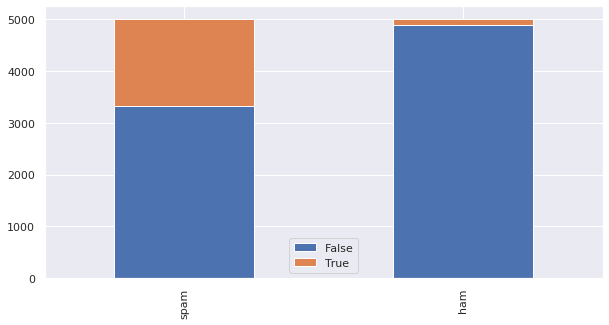

In [125]:
bar_chart('has_link')

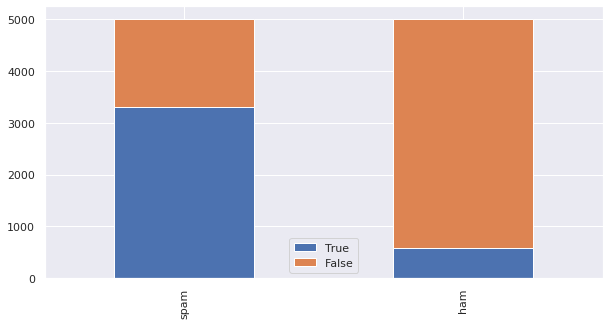

In [126]:
bar_chart('has_image')

In [0]:
#data['label'] = data['label'].replace(['ham','spam'],[0,1])


In [127]:
data['label'].value_counts()

ham     5000
spam    5000
Name: label, dtype: int64

**4.  Feature engineering**

Before applying any model, I am going to do some preprocessing with the data I have. I am going to remove the stop words and converting the sentences into lowercase followed by stemming(ex: chocolates, choco -> to root word "chocolate"

In [0]:
def pre_process(text):
    
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')]
    words = ""
    for i in text:
            stemmer = SnowballStemmer("english")
            words += (stemmer.stem(i))+" "
    return words

In [129]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

After data preprocessing, we will then tokenize the texts column values to bag of  words. We are using TfidfVectorizer here.
TFIDF (term frequency - inverse document frequency) is a statistical method to tell how important a word is to a particular document by increasing the numerical value for an occurrence in the specific document but decreasing relative to number of occurrences in the entire corpus.

In [0]:
textFeatures = data['text'].copy()
textFeatures = textFeatures.apply(pre_process)
vectorizer = TfidfVectorizer("english")
features = vectorizer.fit_transform(textFeatures)


In [131]:
textFeatures.head()

0    offer 1100 sublet room 1 year look eclect hous...
1    want im look roommat want share room find room...
2    seek either studio one bedroom singl room two ...
3    privat room full furn includ entir place1 bedr...
4    jeansjack 59 dortmund httpsinstagramcompbeyiij...
Name: text, dtype: object

In [132]:
features.shape

(10000, 33884)

Now, each of 10000 text is represented by 33884 features, representing the tf-idf score for different unigrams and bigrams.

**5. Modellling the data**

First we need to split the data into training and testing. I am using 80% of data for training and 20% data for testing. Once our model is trained, we will test the model with unseen data to predict the results.

In [0]:
X_train, X_test, y_train, y_test = train_test_split(features, data['label'], test_size=0.2, random_state=10)

5.1 Here we are first trying the support vector machine to see the result.

In [149]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)
prediction = svc.predict(X_test)
accuracy_score(y_test,prediction)

0.958

In [150]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
pred = svc.predict(X_train)
print(classification_report(y_train ,pred ))
print('Confusion Matrix: \n',confusion_matrix(y_train,pred))
print()
print('Accuracy: ', accuracy_score(y_train,pred))

              precision    recall  f1-score   support

         ham       0.99      0.99      0.99      3970
        spam       0.99      0.99      0.99      4030

    accuracy                           0.99      8000
   macro avg       0.99      0.99      0.99      8000
weighted avg       0.99      0.99      0.99      8000

Confusion Matrix: 
 [[3944   26]
 [  28 4002]]

Accuracy:  0.99325


In [136]:
print('Predicted value: ',svc.predict(X_test))
print('Actual value: ',y_test.values)

Predicted value:  ['ham' 'spam' 'ham' ... 'ham' 'spam' 'ham']
Actual value:  ['ham' 'spam' 'ham' ... 'ham' 'spam' 'ham']


Now let's try evaluating the test data set with SVM.


In [137]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
pred = svc.predict(X_test)
print(classification_report(y_test ,pred ))
print('Confusion Matrix: \n', confusion_matrix(y_test,pred))
print()
print('Accuracy: ', accuracy_score(y_test,pred))

              precision    recall  f1-score   support

         ham       0.96      0.95      0.96      1030
        spam       0.95      0.96      0.96       970

    accuracy                           0.96      2000
   macro avg       0.96      0.96      0.96      2000
weighted avg       0.96      0.96      0.96      2000

Confusion Matrix: 
 [[982  48]
 [ 36 934]]

Accuracy:  0.958


5.2  Multinomial Naive bayes 
Lets check what is the result with Naive bayes approach.

In [143]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB(alpha=0.1)
mnb.fit(X_train, y_train)
prediction = mnb.predict(X_test)
accuracy_score(y_test,prediction)

0.922

In [144]:
print(y_train.values)

['spam' 'spam' 'spam' ... 'ham' 'spam' 'ham']


In [145]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
pred = mnb.predict(X_train)
print(classification_report(y_train ,pred ))
print('Confusion Matrix: \n',confusion_matrix(y_train,pred))
print()
print('Accuracy: ', accuracy_score(y_train,pred))

              precision    recall  f1-score   support

         ham       0.94      0.99      0.96      3970
        spam       0.99      0.94      0.96      4030

    accuracy                           0.96      8000
   macro avg       0.96      0.96      0.96      8000
weighted avg       0.96      0.96      0.96      8000

Confusion Matrix: 
 [[3922   48]
 [ 249 3781]]

Accuracy:  0.962875


In [146]:
print('Predicted value: ',mnb.predict(X_test))

print('Actual value: ',y_test.values)

Predicted value:  ['ham' 'spam' 'ham' ... 'ham' 'ham' 'ham']
Actual value:  ['ham' 'spam' 'ham' ... 'ham' 'spam' 'ham']


Lets evaluate the test data with naive bayes.


In [147]:

from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
pred = mnb.predict(X_test)
print(classification_report(y_test ,pred ))
print('Confusion Matrix: \n', confusion_matrix(y_test,pred))
print()
print('Accuracy: ', accuracy_score(y_test,pred))

              precision    recall  f1-score   support

         ham       0.89      0.97      0.93      1030
        spam       0.97      0.87      0.92       970

    accuracy                           0.92      2000
   macro avg       0.93      0.92      0.92      2000
weighted avg       0.93      0.92      0.92      2000

Confusion Matrix: 
 [[1000   30]
 [ 126  844]]

Accuracy:  0.922


As we can see here, SVM outperforms the naive bayes.